Dataset from kaggle:https://www.kaggle.com/datasets/abhinav89/telecom-customer?resource=download
Target variable is churn, the goal is to predict whether the customer will churn or not

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from numpy import arange
from skfeature.function.similarity_based import fisher_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import graphviz
from sklearn import tree

In [41]:
data =  pd.read_csv('preprocessed_dataset.csv')

In [42]:
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,0.007836,0.017961,0.113102,0.001553,0.000000,0.000000,0.000000,0.0,0.0,0.105936,...,0.0,0.529412,0.0,0.0,0.0,0.0,0.0,0.5,0.200219,0.00000
1,0.016538,0.039548,0.147263,0.001553,0.005265,0.008255,0.010155,0.0,0.0,0.125583,...,0.0,0.941176,0.0,0.0,0.0,0.0,0.0,0.5,0.134026,0.00001
2,0.006016,0.000840,0.100491,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.110296,...,0.0,0.529412,0.0,0.5,0.0,0.0,0.0,0.5,0.825492,0.00002
3,0.011474,0.000614,0.148579,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.110374,...,0.0,0.823529,0.5,0.0,0.0,0.0,0.0,0.5,0.993982,0.00003
4,0.015950,0.046736,0.226354,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.111514,...,0.0,0.352941,0.0,0.0,0.0,0.0,0.0,0.5,0.240153,0.00004


In [43]:
# separating features and a target variable
X = data.drop(['churn'], axis=1)
y = data.loc[:, 'churn']

# Train Test Split

In [44]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=43, shuffle=True)

# Modelling

## Logistic regerssion 

In [45]:
log_reg = LogisticRegression()

In [46]:
log_reg.fit(X_train, y_train)

/home/anna/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred = log_reg.predict(X_test)

In [48]:
accuracy_lr = accuracy_score(y_test, y_pred)

print(f"Accuracy of Logistic Regression is :{accuracy_lr}")

Accuracy of Logistic Regression is :0.5896


## Decision Trees

In [49]:
clf = DecisionTreeClassifier()

In [50]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred = clf.predict(X_test)

In [52]:
accuracy_clf = accuracy_score(y_test, y_pred)

print(f"Accuracy of Decision Trees is :{accuracy_clf}")

Accuracy of Decision Trees is :0.54905


In [53]:
#Let's see the confuson matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [54]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

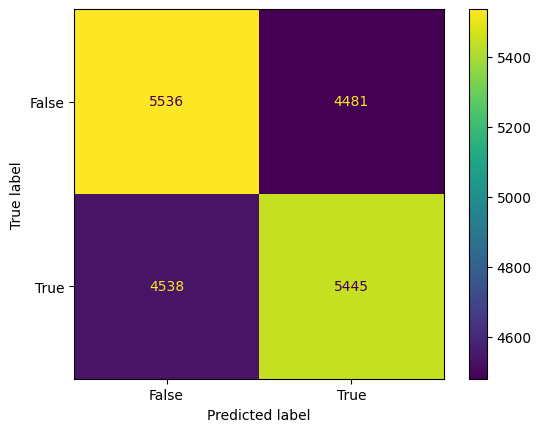

In [55]:
cm_display.plot()
plt.show()

In [56]:
# Prunning the tree, because it seems to overfit


#defining parameter grid
params={'max_depth':[2,4,6,8,10,12],'min_samples_split': [2,3,4,5], 'min_samples_leaf': [1, 2]}


clf=DecisionTreeClassifier()
search=GridSearchCV(estimator=clf, param_grid=params)
search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5]})

In [57]:
print(search.best_estimator_)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=5)


In [58]:
#Trying the best model
clf=search.best_estimator_

clf.fit(X_train, y_train)

preds = clf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

print(f"Accuracy of a pruned tree : {accuracy}")

Accuracy of a pruned tree : 0.60595


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [60]:
rf = RandomForestClassifier()

In [61]:
rf.fit(X_train, y_train)

preds = rf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

print(f"Accuracy of a Random Forest : {accuracy}")

Accuracy of a Random Forest : 0.6246


In [62]:
# Lists of hyperparameters for GridSearch

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 3)] 

# Number of features to consider at every split
max_features = ['sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [2,4,6,8,10,12]

# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [63]:
finder = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params,
    scoring='accuracy',
    verbose=3,
    return_train_score=True
)

In [64]:
finder.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=(train=0.613, test=0.603) total time=   8.6s
[CV 2/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=(train=0.610, test=0.598) total time=   8.5s
[CV 3/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=(train=0.612, test=0.601) total time=   8.5s
[CV 4/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=(train=0.612, test=0.596) total time=   8.1s
[CV 5/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=(train=0.612, test=0.599) total time=   8.1s
[CV 1/5] END max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.592, test=0.589) total time=   5.3s
[CV 2/5]

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [50, 75, 100]},
                   return_train_score=True, scoring='accuracy', verbose=3)

In [65]:
finder.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [66]:
rf = RandomForestClassifier(n_estimators=75,
 min_samples_split=3,
 min_samples_leaf=2,
 max_features='sqrt',
 max_depth=12)


rf.fit(X_train, y_train)

preds = rf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

print(f"Accuracy of a tuned Random Forest : {accuracy}")

Accuracy of a tuned Random Forest : 0.6268
